In [2]:
import numpy as np
from scipy import special
from scipy import optimize
import matplotlib.pyplot as plt

## First example

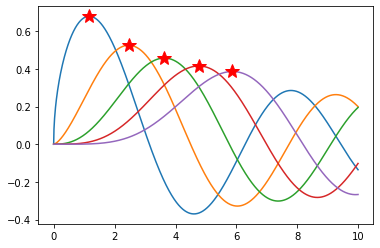

In [78]:
x = np.arange(0,10,0.01)
for k in np.arange(0.5,5.5):
     y = special.jv(k,x)
     plt.plot(x,y)
     f = lambda x: -special.jv(k,x)
     x_max = optimize.fminbound(f,0,6)
     plt.plot([x_max], [special.jv(k,x_max)],'r*',markersize=15)

## Initial point problem

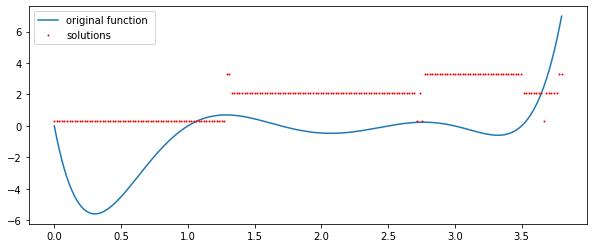

In [7]:
f = lambda x: -x*(1-x)*(1.7-x)*(2.5-x)*(3-x)*(3.5-x)
x = np.linspace(0,3.8,201)
y = [optimize.minimize(f,y).x[0] for y in x]

fig = plt.figure(figsize=(10,4))
plt.plot(x,f(x), label = 'original function ');
plt.plot(x,y, 'ro', label = 'solutions', markersize=1);
plt.legend();
# res=optimize.minimize(f,0)
# fres.x

## How to track optim path

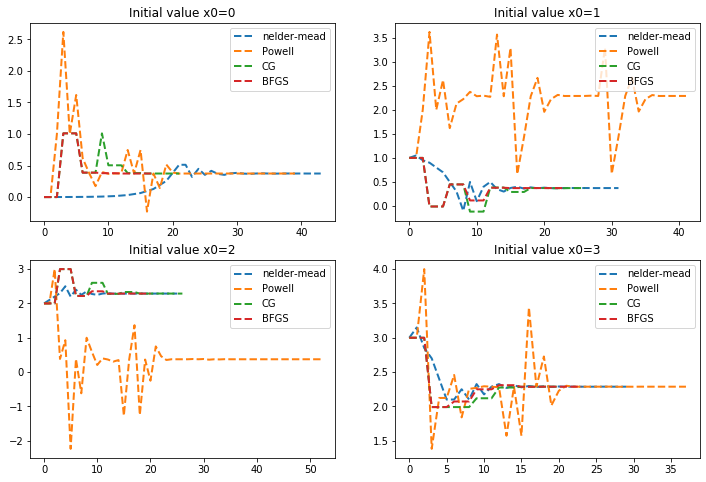

In [183]:
fig = plt.figure(figsize=(12,8))
def f(x):
    res = -x*(1-x)*(2-x)*(2.5-x)
    f.count += 1
#     print('x = ', x, ' res = ', res, '  j = ', f.count)
    rr.append(float(x))
    return res

for j, x0 in enumerate([0,1,2,3]):
    plt.subplot(2,2,j+1)
    for i in ['nelder-mead','Powell','CG','BFGS']:
        f.count = 0
        rr=[]
        res=optimize.minimize(f,x0, method=i)
        plt.plot(rr,'--',label=i, linewidth=2)
        plt.title('Initial value x0={}'.format(x0))
        plt.legend()

## 2D example

### Without gradient

[1.29878676e-05 1.74368087e-05]
[7.10542736e-15 1.77635684e-15]
[7.16435183e-09 2.25834240e-09]
[ 6.02711622e-07 -5.47550350e-08]


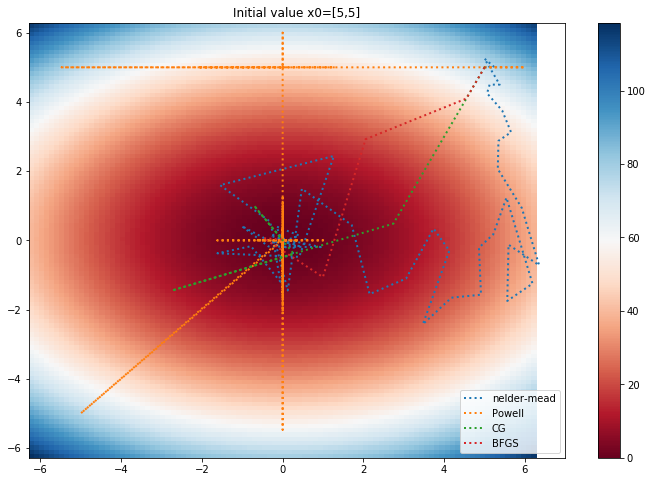

In [182]:
def f(x,y):
    return x**2+2*y**2
    
def ff(x):
    res = f(x[0],x[1])
    ff.count += 1
#     print('x = ', x, ' res = ', res, '  j = ', f.count)
    rx.append(x[0])
    ry.append(x[1])
    return res


fig = plt.figure(figsize=(12,8))
X,Y = np.meshgrid(np.linspace(-2*np.pi,2*np.pi,101), np.linspace(-2*np.pi,2*np.pi,101))
z=f(X,Y)
plt.pcolormesh(X,Y, z, cmap='RdBu');
plt.colorbar();


# # for j, x0 in enumerate([0,1,2,3]):
# #     plt.subplot(2,2,j+1)
for i in ['nelder-mead','Powell','CG','BFGS']:
    ff.count = 0
    rx,ry=[],[]
    
    res=optimize.minimize(ff,np.array([5,5]), method=i)
    print(res.x)
    plt.plot(rx,ry,':',label=i, linewidth=2)
    plt.title('Initial value x0={}'.format('[5,5]'))
    plt.legend()
# print(rr)

### with gradient

[2.22044605e-16 2.22044605e-16]
[ 6.02711622e-07 -5.47550350e-08]


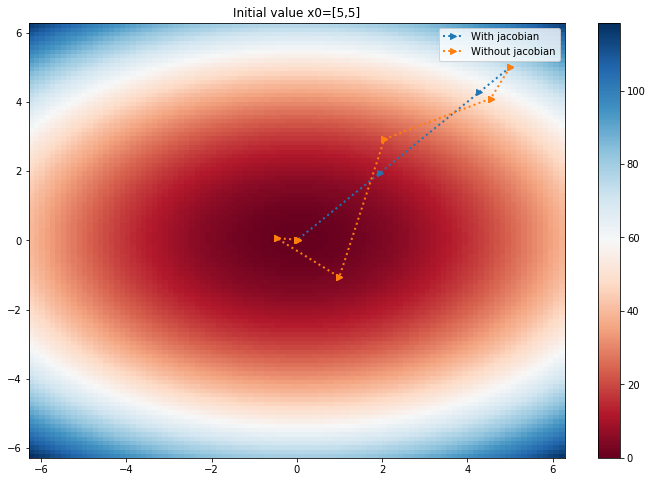

In [179]:

def dff(x):
    return np.array([2*x[0],2*x[1]])

fig = plt.figure(figsize=(12,8))
X,Y = np.meshgrid(np.linspace(-2*np.pi,2*np.pi,101), np.linspace(-2*np.pi,2*np.pi,101))
z=f(X,Y)
plt.pcolormesh(X,Y, z, cmap='RdBu');
plt.colorbar();


# # for j, x0 in enumerate([0,1,2,3]):
# #     plt.subplot(2,2,j+1)
for i,l in zip([dff, None],['With jacobian','Without jacobian']):
    ff.count = 0
    rx,ry=[],[]
    
    res=optimize.minimize(ff,np.array([5,5]),jac=i,method='BFGS')
    print(res.x)
    plt.plot(rx,ry,':>',label=l, linewidth=2)
    plt.title('Initial value x0={}'.format('[5,5]'))
    plt.legend()
# print(rr)

## ddd